# Random forest 

Introduction
Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

One of the most important features of the Random Forest Algorithm is that it
can handle the data set containing continuous variables as in the case of
regression and categorical variables as in the case of classification. 
It performs better results for classification problems.

Real Life Analogy
Let’s dive into a real-life analogy to understand this concept further. 
A student named X wants to choose a course after his 10+2, and he is 
confused about the choice of course based on his skill set. 
So he decides to consult various people like his cousins, teachers, parents,
degree students, and working people. He asks them varied questions like why he 
should choose, job opportunities with that course, course fee, etc. 
Finally, after consulting various people about the course he decides 
to take the course suggested by most of the people.



Working of Random Forest Algorithm
Before understanding the working of the random forest we must look into 
the ensemble technique. Ensemble simply means combining multiple models. 
Thus a collection of models is used to make predictions rather than an 
individual model.

Ensemble uses two types of methods:

1. Bagging– It creates a different training subset from sample training 
data with replacement & the final output is based on majority voting.
For example,  Random Forest.

2. Boosting– It combines weak learners into strong learners by creating 
sequential models such that the final model has the highest accuracy. 
For example,  ADA BOOST, XG BOOST



In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://editor.analyticsvidhya.com/uploads/4661536426211ba43ea612c8e1a6a1ed45507.png")


In [26]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://editor.analyticsvidhya.com/uploads/77772440px-Ensemble_Bagging.svg.png")


Now let’s look at an example by breaking it down with the help of the following figure. 
Here the bootstrap sample is taken from actual data
(Bootstrap sample 01, Bootstrap sample 02, and Bootstrap sample 03) with a replacement 
which means there is a high possibility that each sample won’t contain unique data. Now 
the model (Model 01, Model 02, and Model 03) obtained from this bootstrap sample is trained 
independently. Each model generates results as shown. Now Happy emoji is having a majority when
compared to sad emoji. Thus based on majority voting final output is obtained as Happy emoji.

 

In [27]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://editor.analyticsvidhya.com/uploads/325745-Bagging-ensemble-method.png")


Steps involved in random forest algorithm:

Step 1: In Random forest n number of random records are taken from the data set having k number of records.

Step 2: Individual decision trees are constructed for each sample.

Step 3: Each decision tree will generate an output.

Step 4: Final output is considered based on Majority Voting or Averaging for Classification and regression respectively.

In [28]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://editor.analyticsvidhya.com/uploads/24015Random+Forest.jpg")

For example:  consider the fruit basket as the data as shown in the figure below. Now n number of samples are taken from the fruit basket and an individual decision tree is constructed for each sample. 
    Each decision tree will generate an output as shown in the figure. The final output is considered based on majority voting. In the below figure you can see that the majority decision tree gives output
    as an apple when compared to a banana, so the final output is taken as an apple.

In [29]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://editor.analyticsvidhya.com/uploads/33019random-forest-algorithm2.png")

Important Features of Random Forest
1. Diversity- Not all attributes/variables/features are considered while making an individual tree, each tree is different.

2. Immune to the curse of dimensionality- Since each tree does not consider all the features, the feature space is reduced.

3. Parallelization-Each tree is created independently out of different data and attributes. This means that we can make full use of the CPU to build random forests.

4.  Train-Test split- In a random forest we don’t have to segregate the data for train and test as there will always be 30% of the data which is not seen by the decision tree.

5.  Stability- Stability arises because the result is based on majority voting/ averaging.

 Import the libraries.

In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

 Import the dataset.

In [3]:
# Reading the csv file and putting it into 'df' object
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\Decision-Tree-Hyperparameter-Tuning-App-master\heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


Putting Feature Variable to X and Target variable to y.

In [4]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)
# Putting response variable to y
y = df['heart disease']

Train-Test-Split is performed

In [5]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

In [6]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

Train-Test-Split is performed

In [7]:
from sklearn.ensemble import RandomForestClassifier

Important Hyperparameters
Hyperparameters are used in random forests to either enhance the performance and predictive power of models or to make the model faster.

Following hyperparameters increases the predictive power:

1. n_estimators– number of trees the algorithm builds before averaging the predictions.

2. max_features– maximum number of features random forest considers splitting a node.

3. mini_sample_leaf– determines the minimum number of leaves required to split an internal node.

Following hyperparameters increases the speed:

1. n_jobs– it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor but if the value is -1 there is no limit.

2. random_state– controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and if it has been given the same hyperparameters and the same training data.

3. oob_score – OOB means out of the bag. It is a random forest cross-validation method. In this one-third of the sample is not used to train the data instead used to evaluate its performance. These samples are called out of bag samples.

 

In [8]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [9]:
%%time
classifier_rf.fit(X_train, y_train)

Wall time: 344 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [10]:
# checking the oob score
classifier_rf.oob_score_

0.656084656084656

In [11]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [12]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [15]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 1min 9s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [16]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 1min 3s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [19]:
grid_search.best_score_

0.6985815602836879

In [17]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

Visualize

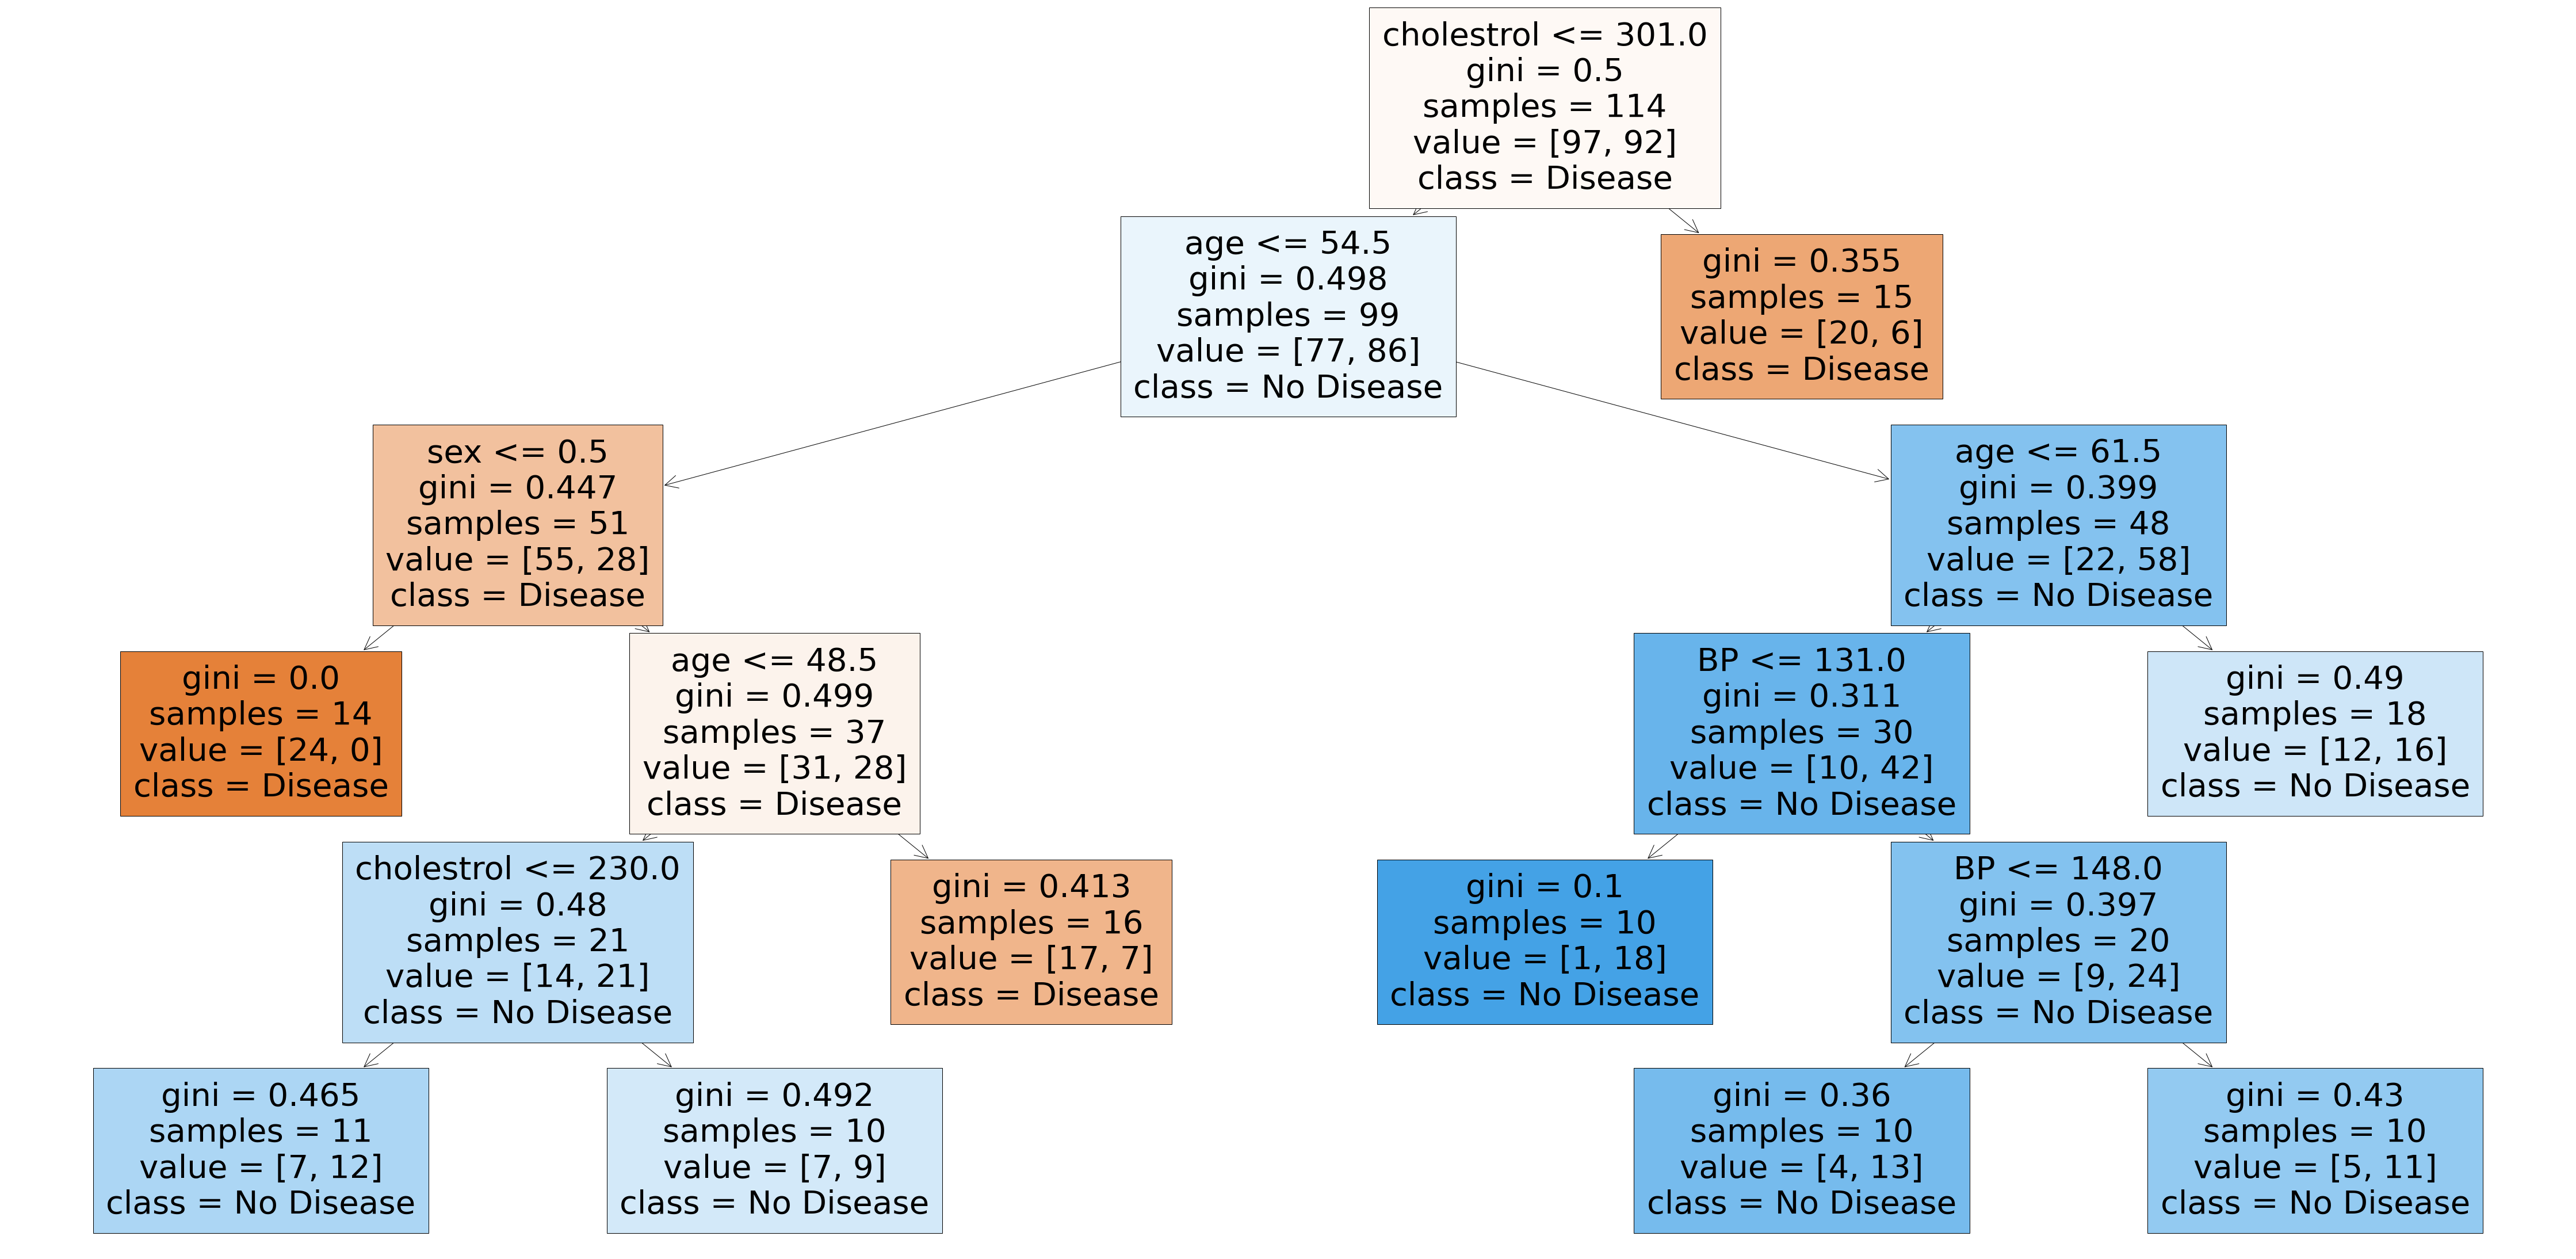

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

In [20]:
rf_best.feature_importances_

array([0.46128487, 0.2180848 , 0.13174619, 0.18888413])

In [21]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [22]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive\pima-indians-diabetes.csv", header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [6]:
y_pred = clf.predict(X_test)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[114  32]
 [ 39  46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       146
           1       0.59      0.54      0.56        85

    accuracy                           0.69       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231

Accuracy: 0.6926406926406926


In [32]:


from sklearn.tree import export_graphviz
import sys
import six

sys.modules['sklearn.externals.six'] = six 
##from sklearn.externals.six 
from six import StringIO
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
      filled=True, rounded=True,
      special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(r'C:\Users\Lenovo\Downloads\archive\Pima_diabetes_Tree.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [31]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'